In [3]:
##importing necessary libaries 
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

##### Reading the dataset

In [4]:
df=pd.read_excel("HeartDeasese.xlsx")

In [5]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### No null Values

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.shape

(303, 14)


##### Check for duplicates

In [9]:
duplicate=df[df.duplicated()]

In [10]:
duplicate

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1

#### 1 duplicate found
#### Droping the duplicate 

In [11]:
data=df.drop_duplicates()

In [12]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[302 rows x 14 columns]

In [13]:
data[data.duplicated()]

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []

In [14]:
data.shape

(302, 14)

# Central Tendencies and Spread of data

In [15]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

######   Using count plot on the categorical variables for better understanding

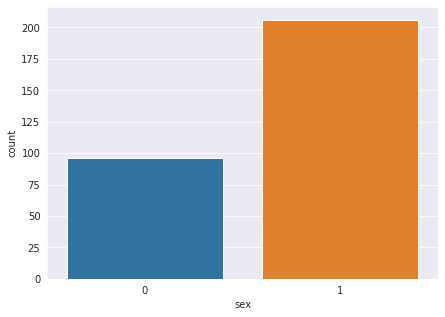

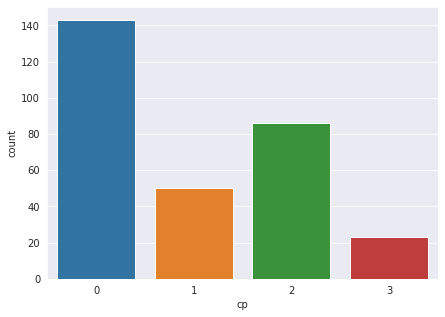

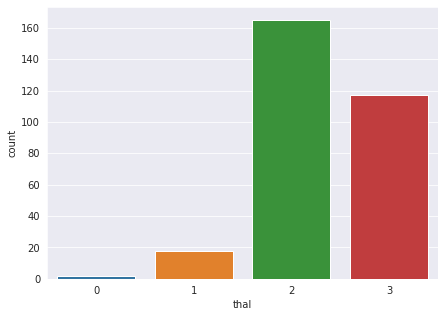

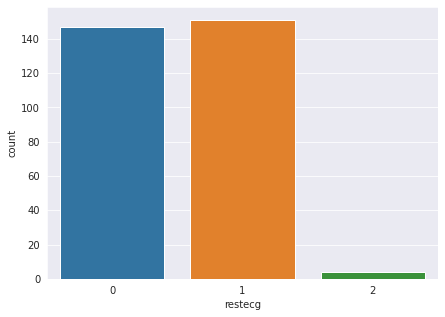

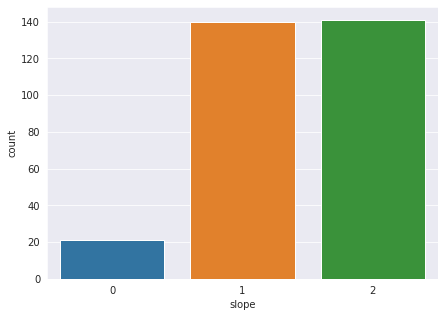

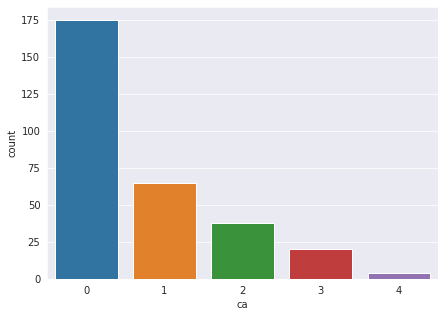

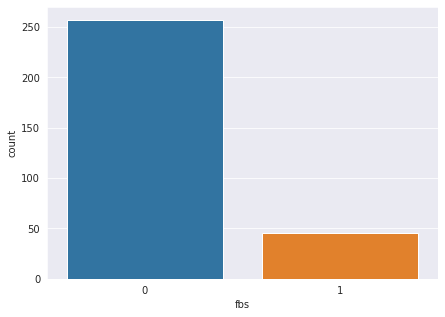

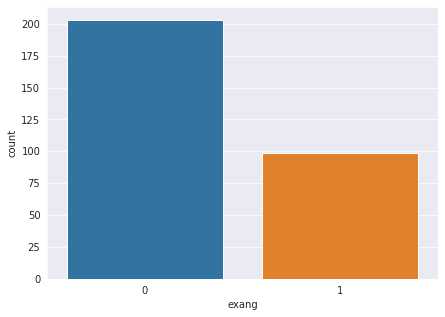

In [16]:
category=data.loc[:,["sex","cp","thal","restecg","slope","ca","fbs","exang"]]
for col in category:
     plt.figure(figsize=(7,5))
     sns.countplot(x=category[col])
     plt.show()


In [17]:
youngage = data[(data.age<40) & (data.target==0)]
actyoungage = data[(data.age<40)]
middleage =data[(data.age>40) & (data.age<50) & (data.target==0)]
actmiddleage =data[(data.age>40) & (data.age<50)]
oldage=data[(data.age>50) & (data.target==0)]
actoldage=data[(data.age>50)]

In [18]:
x=["YoungPeopleWithCVD","TotalNoOfYoung","MiddleAgePeopleWithCVD","TotalNoOfMiddleAge","OldPeopleWithCVD","TotalNoOfOldage"]
y=[len(youngage),len(actyoungage),len(middleage),len(actmiddleage),len(oldage),len(actoldage)]

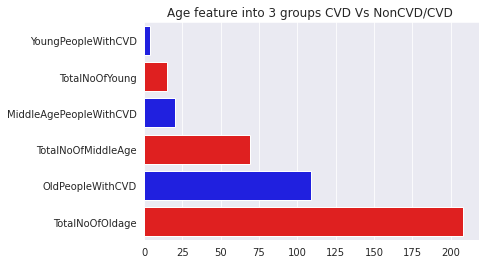

In [19]:
#plotting the bar graph for different age intervals and their CVD impact 
plt.title("Age feature into 3 groups CVD Vs NonCVD/CVD ")
w=["b","r"]
ax = sns.barplot(x=y, y=x,palette=w)

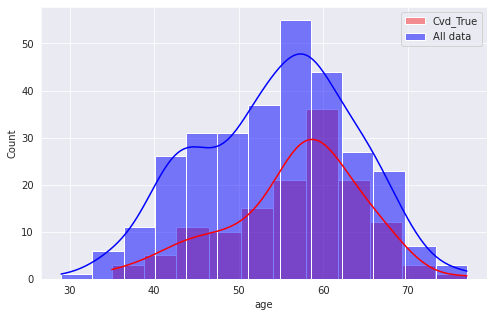

In [20]:
#Study the occurrence of CVD across the Age category
cvd_true = data.loc[data.target == 0]
plt.figure(figsize=(8,5))
sns.histplot(x=cvd_true.age,kde=True,label='Cvd_True',color='red',alpha=0.4)
sns.histplot(x=data.age,kde=True,label='All data',color='blue',alpha=0.5)
plt.legend()
plt.show()

In [21]:
data["trestbps"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

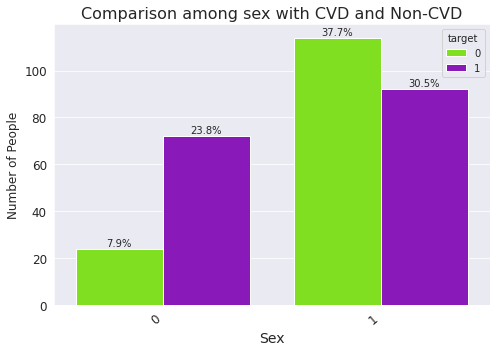

In [22]:
#Plotting the CVD wrt sex of two catagories  
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=data, x='sex',
                   hue='target', 
                   palette=['chartreuse', 'darkviolet'])
plt.xticks(size=12)
plt.xlabel('Sex', size=14)
plt.yticks(size=12)
plt.ylabel('Number of People', size=12)
plt.title("Comparison among sex with CVD and Non-CVD", size=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = len(data['sex'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='target', ylabel='trestbps'>

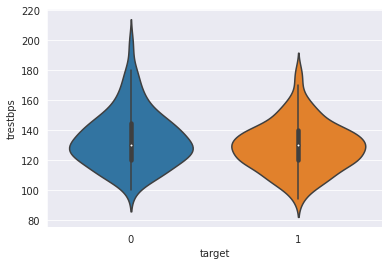

In [23]:
#comparing the resting blood pressure for both cvd and non-cvd 
sns.violinplot(data=data,x=data["target"],y=data["trestbps"])

<AxesSubplot:xlabel='target', ylabel='trestbps'>

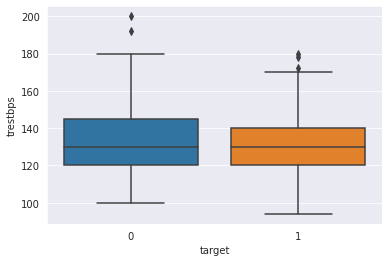

In [24]:
sns.boxplot(x=data["target"],y=data["trestbps"])

<AxesSubplot:xlabel='target', ylabel='chol'>

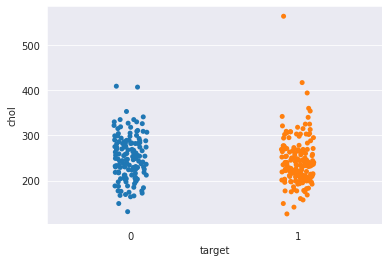

In [25]:
sns.stripplot(y=data["chol"],x=data["target"])

<AxesSubplot:xlabel='slope', ylabel='count'>

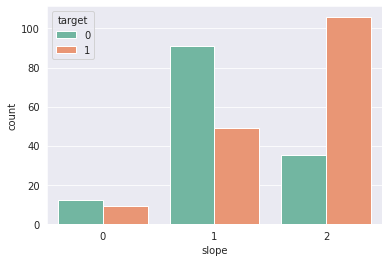

In [26]:
sns.countplot(data['slope'],hue=data["target"]
,palette='Set2')

In [27]:
#data.thal.drop('0',axis=0,inplace=True)
data=data.loc[data['thal']!= 0 ]
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[300 rows x 14 columns]

<AxesSubplot:xlabel='thal', ylabel='count'>

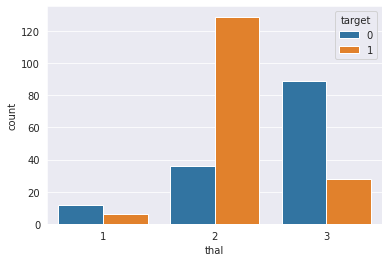

In [28]:
# checking if the thalassemia is the major cause
sns.countplot(data.thal,hue=data.target)


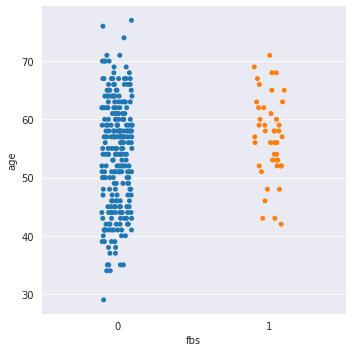

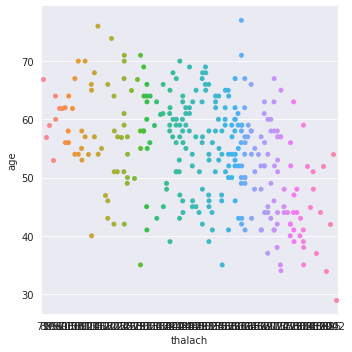

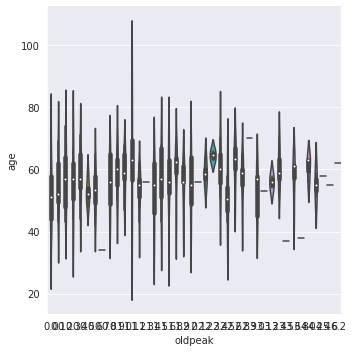

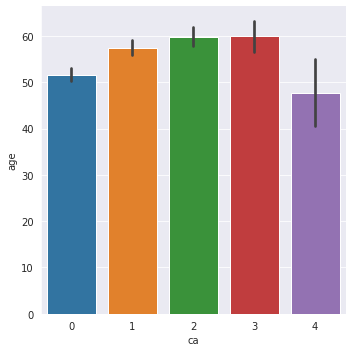

In [29]:
#how the other factors determine the occurrence of CVD

sns.catplot(x ='fbs', y ='age', data = data) 
sns.catplot(x ='thalach', y ='age', data = data)
plt.show()
sns.catplot(x ='oldpeak', y ='age', data = data, kind='violin')
plt.show()
sns.catplot(x ='ca', y ='age', data = data, kind='bar')
plt.show()

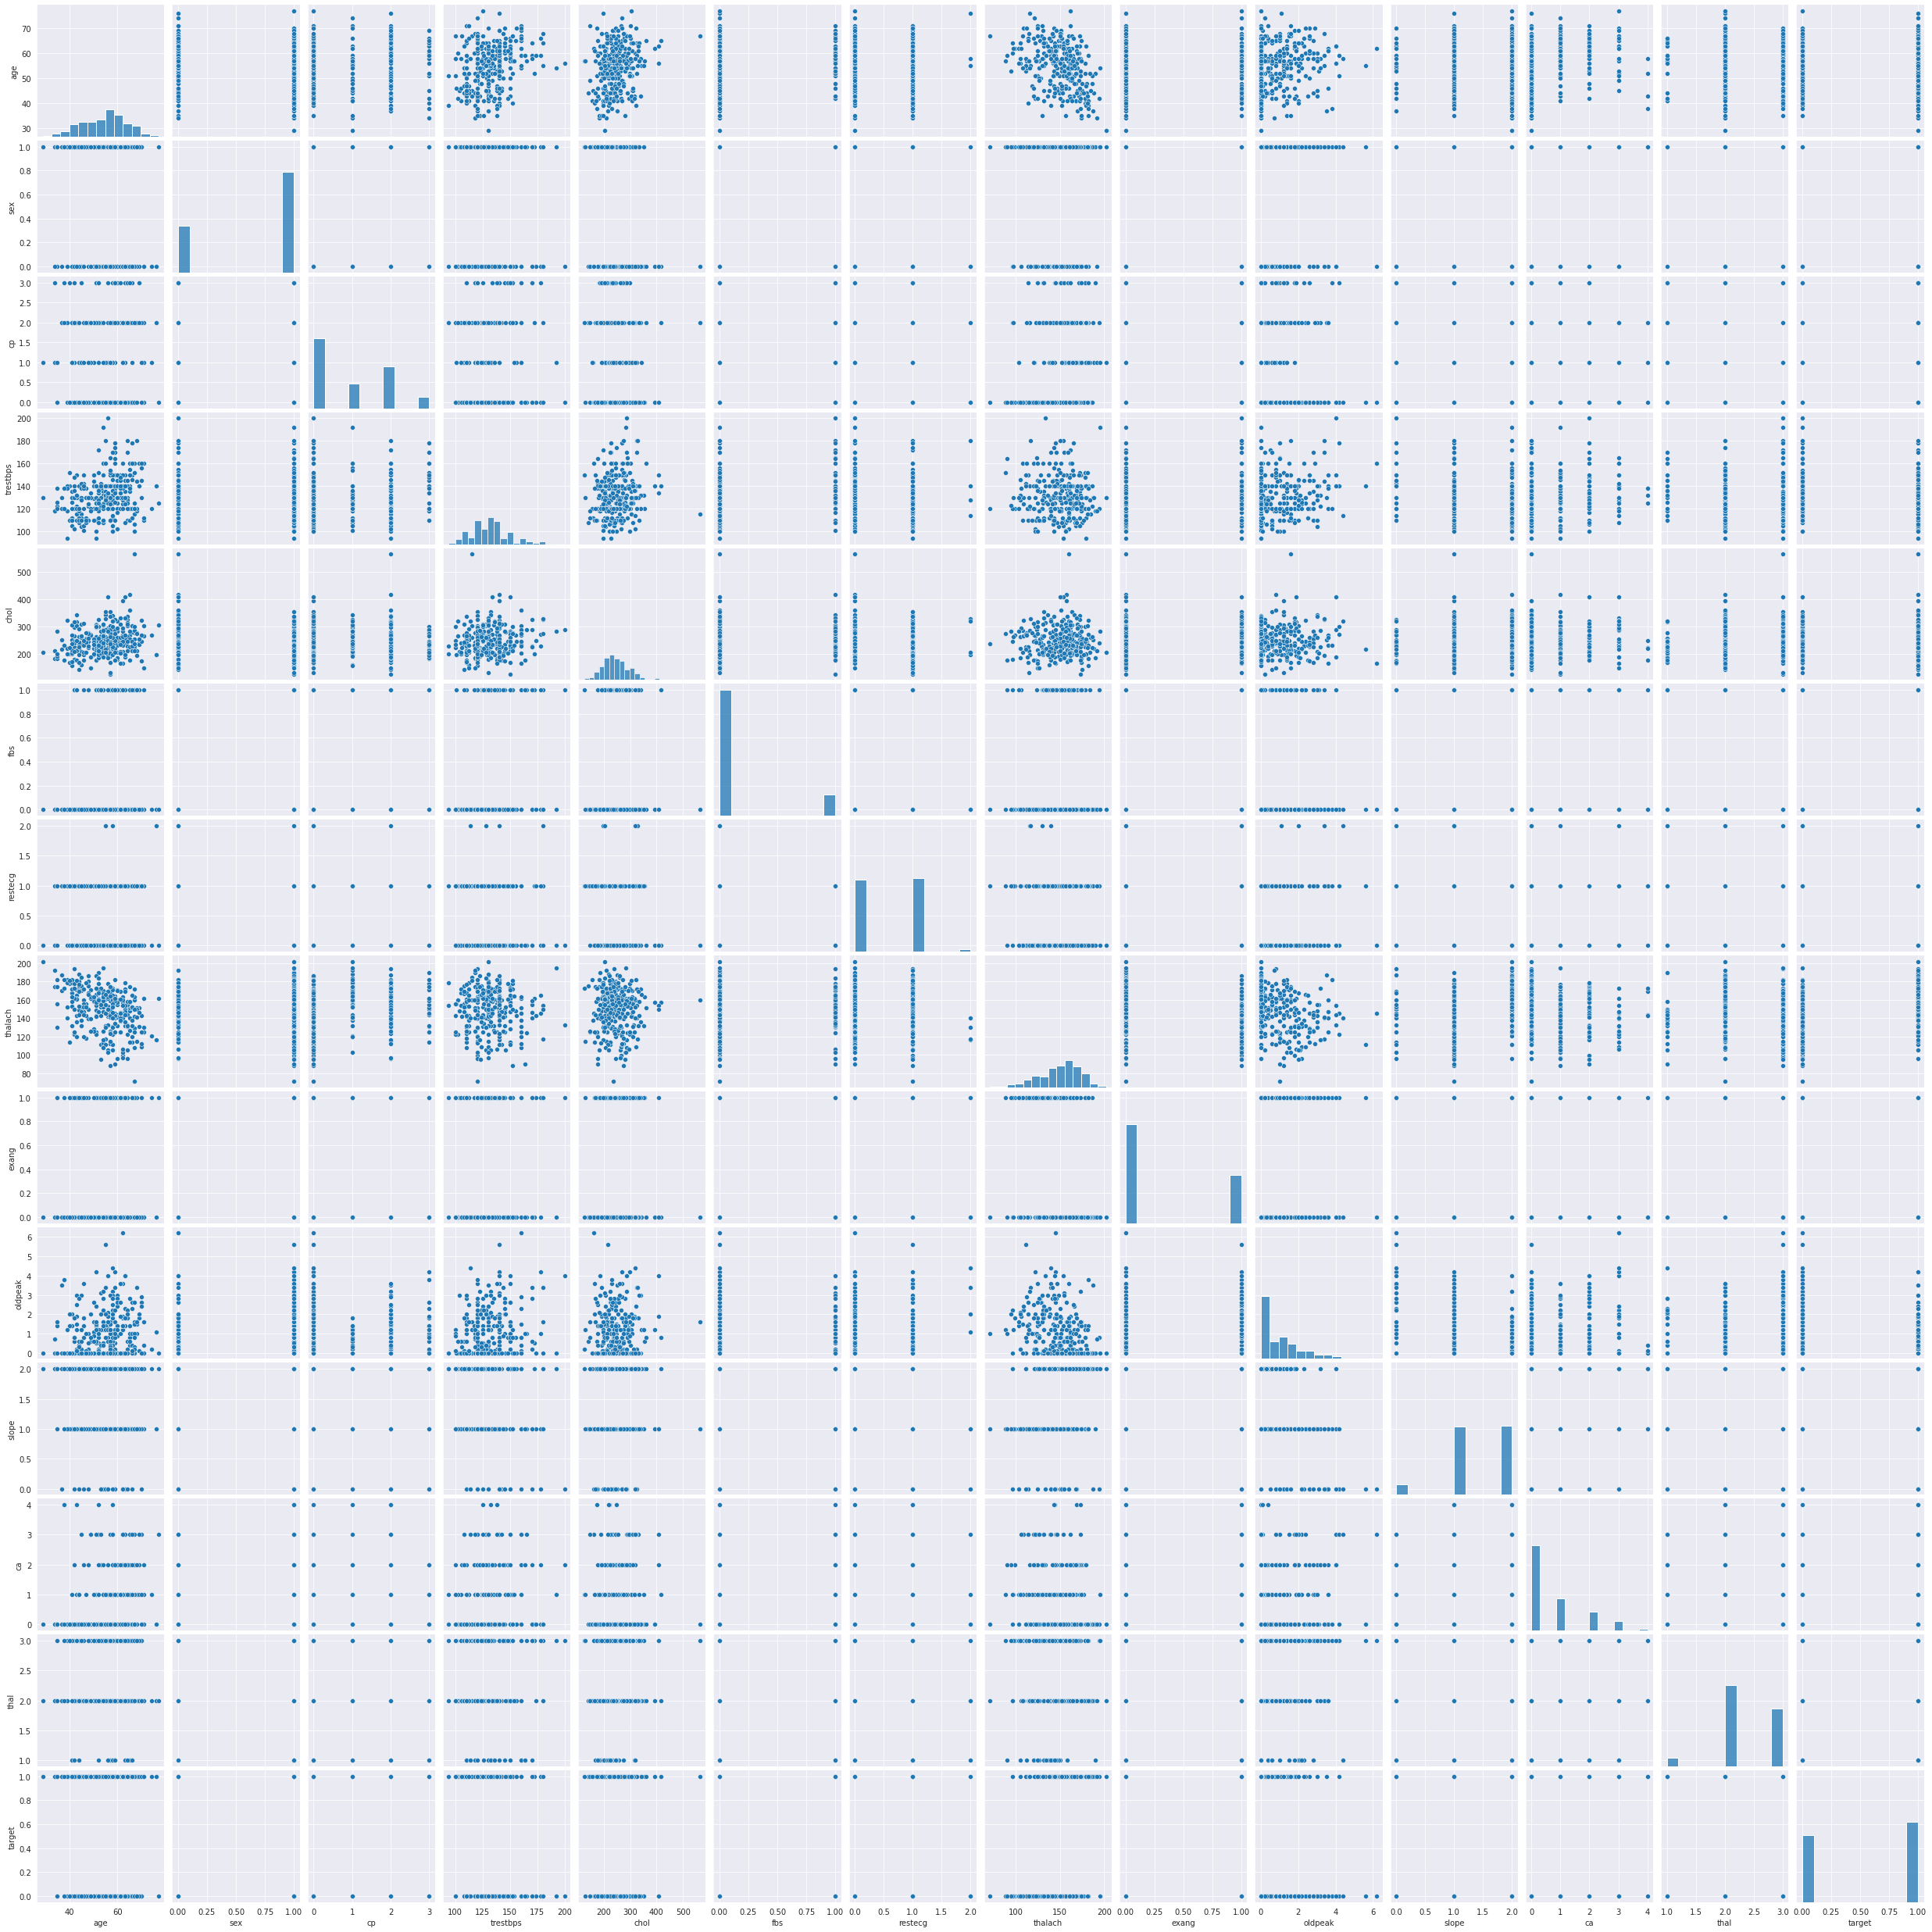

In [30]:
#mutivarient analysis done across all variables
sns.pairplot(data)

<AxesSubplot:>

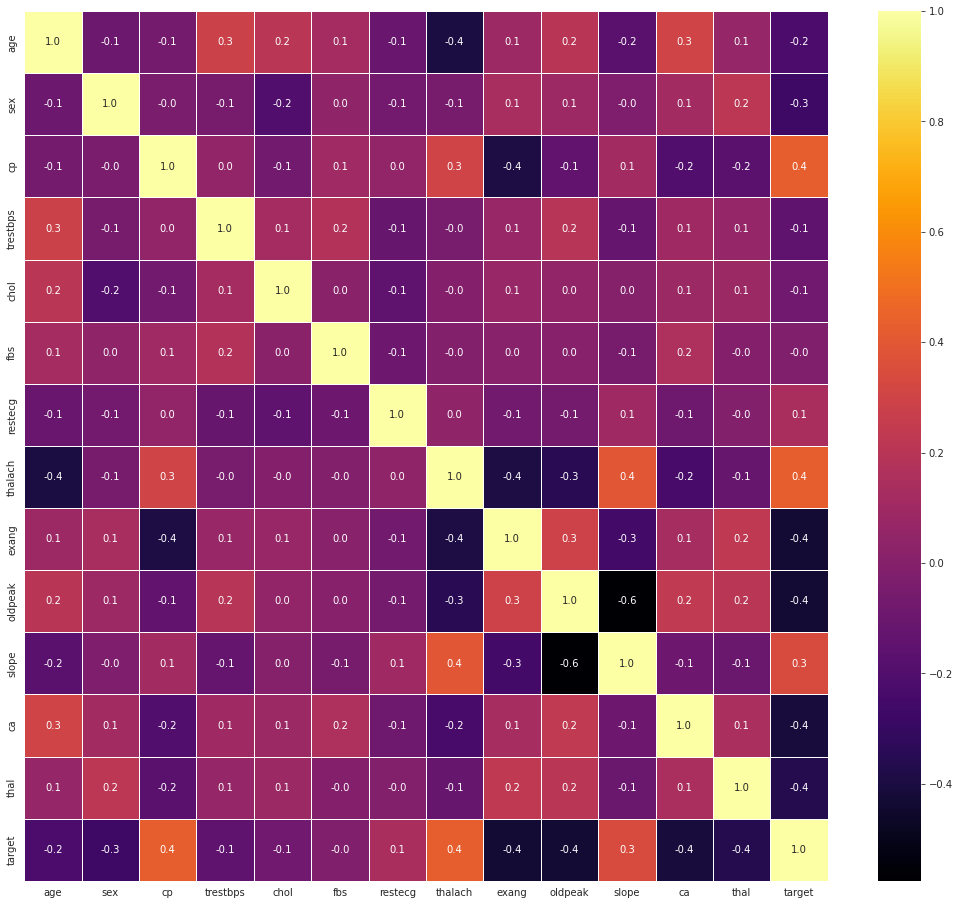

In [31]:
#Plotting a heatmap for correlation
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(),annot=True, fmt='.1f', linecolor='white',linewidths= 1.001,cmap='inferno')

In [32]:
!pip install autoviz



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 9.9 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=d7e91871c3f2ab9f5aa8a78fb9c4ddae7f60d419de5f8072dcc19ade459e3f64
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59

In [37]:

from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported v0.1.58. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine


Shape of your Data Set loaded: (303, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  9
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  4
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    14 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Co

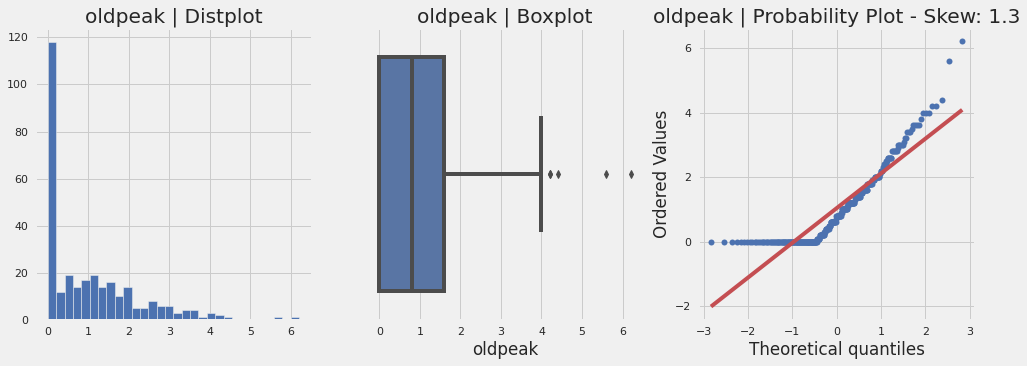

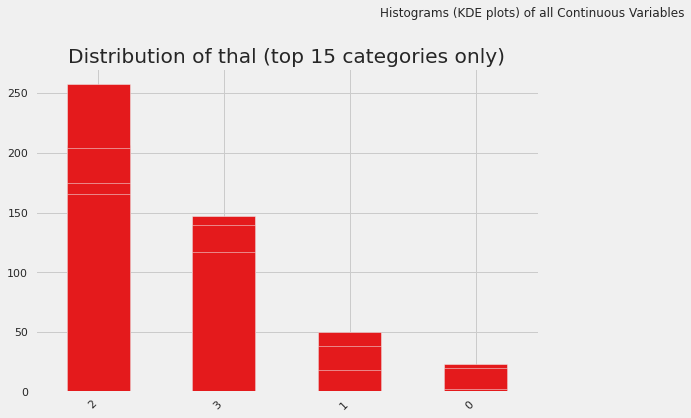

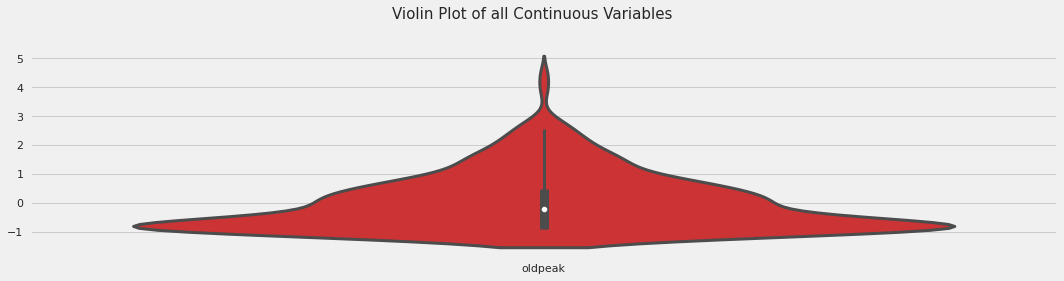

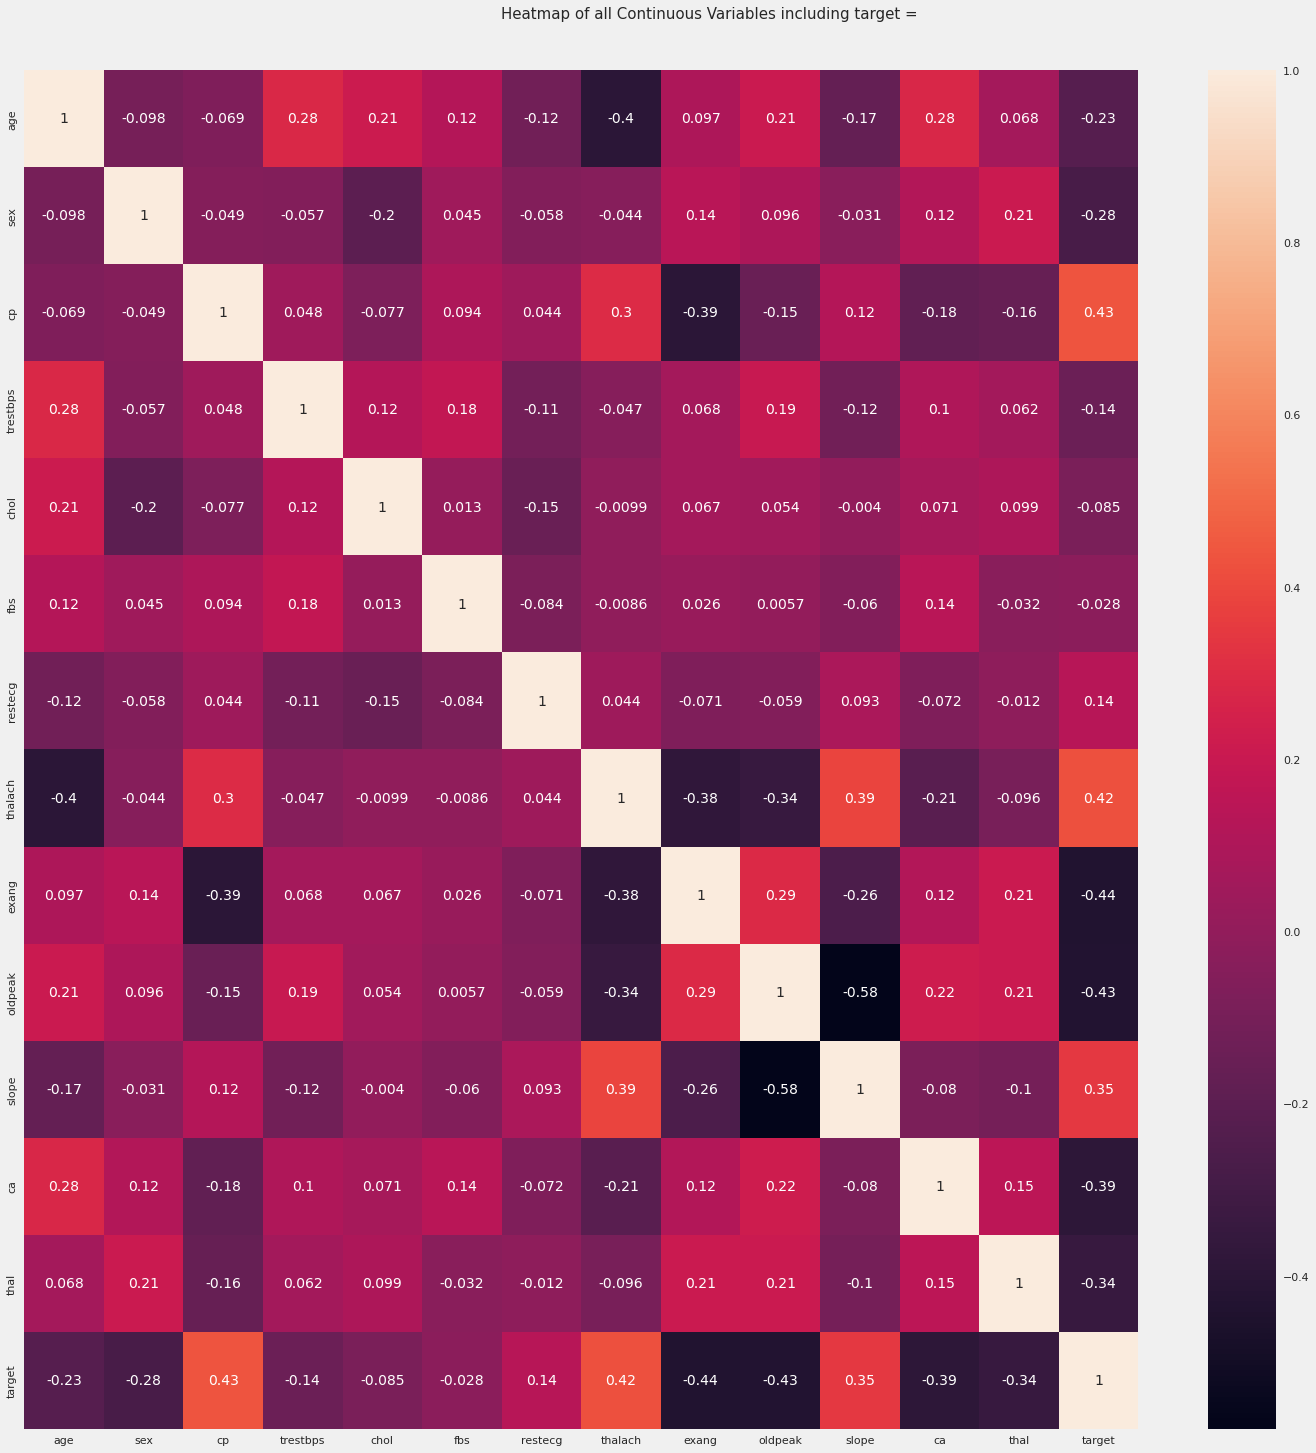

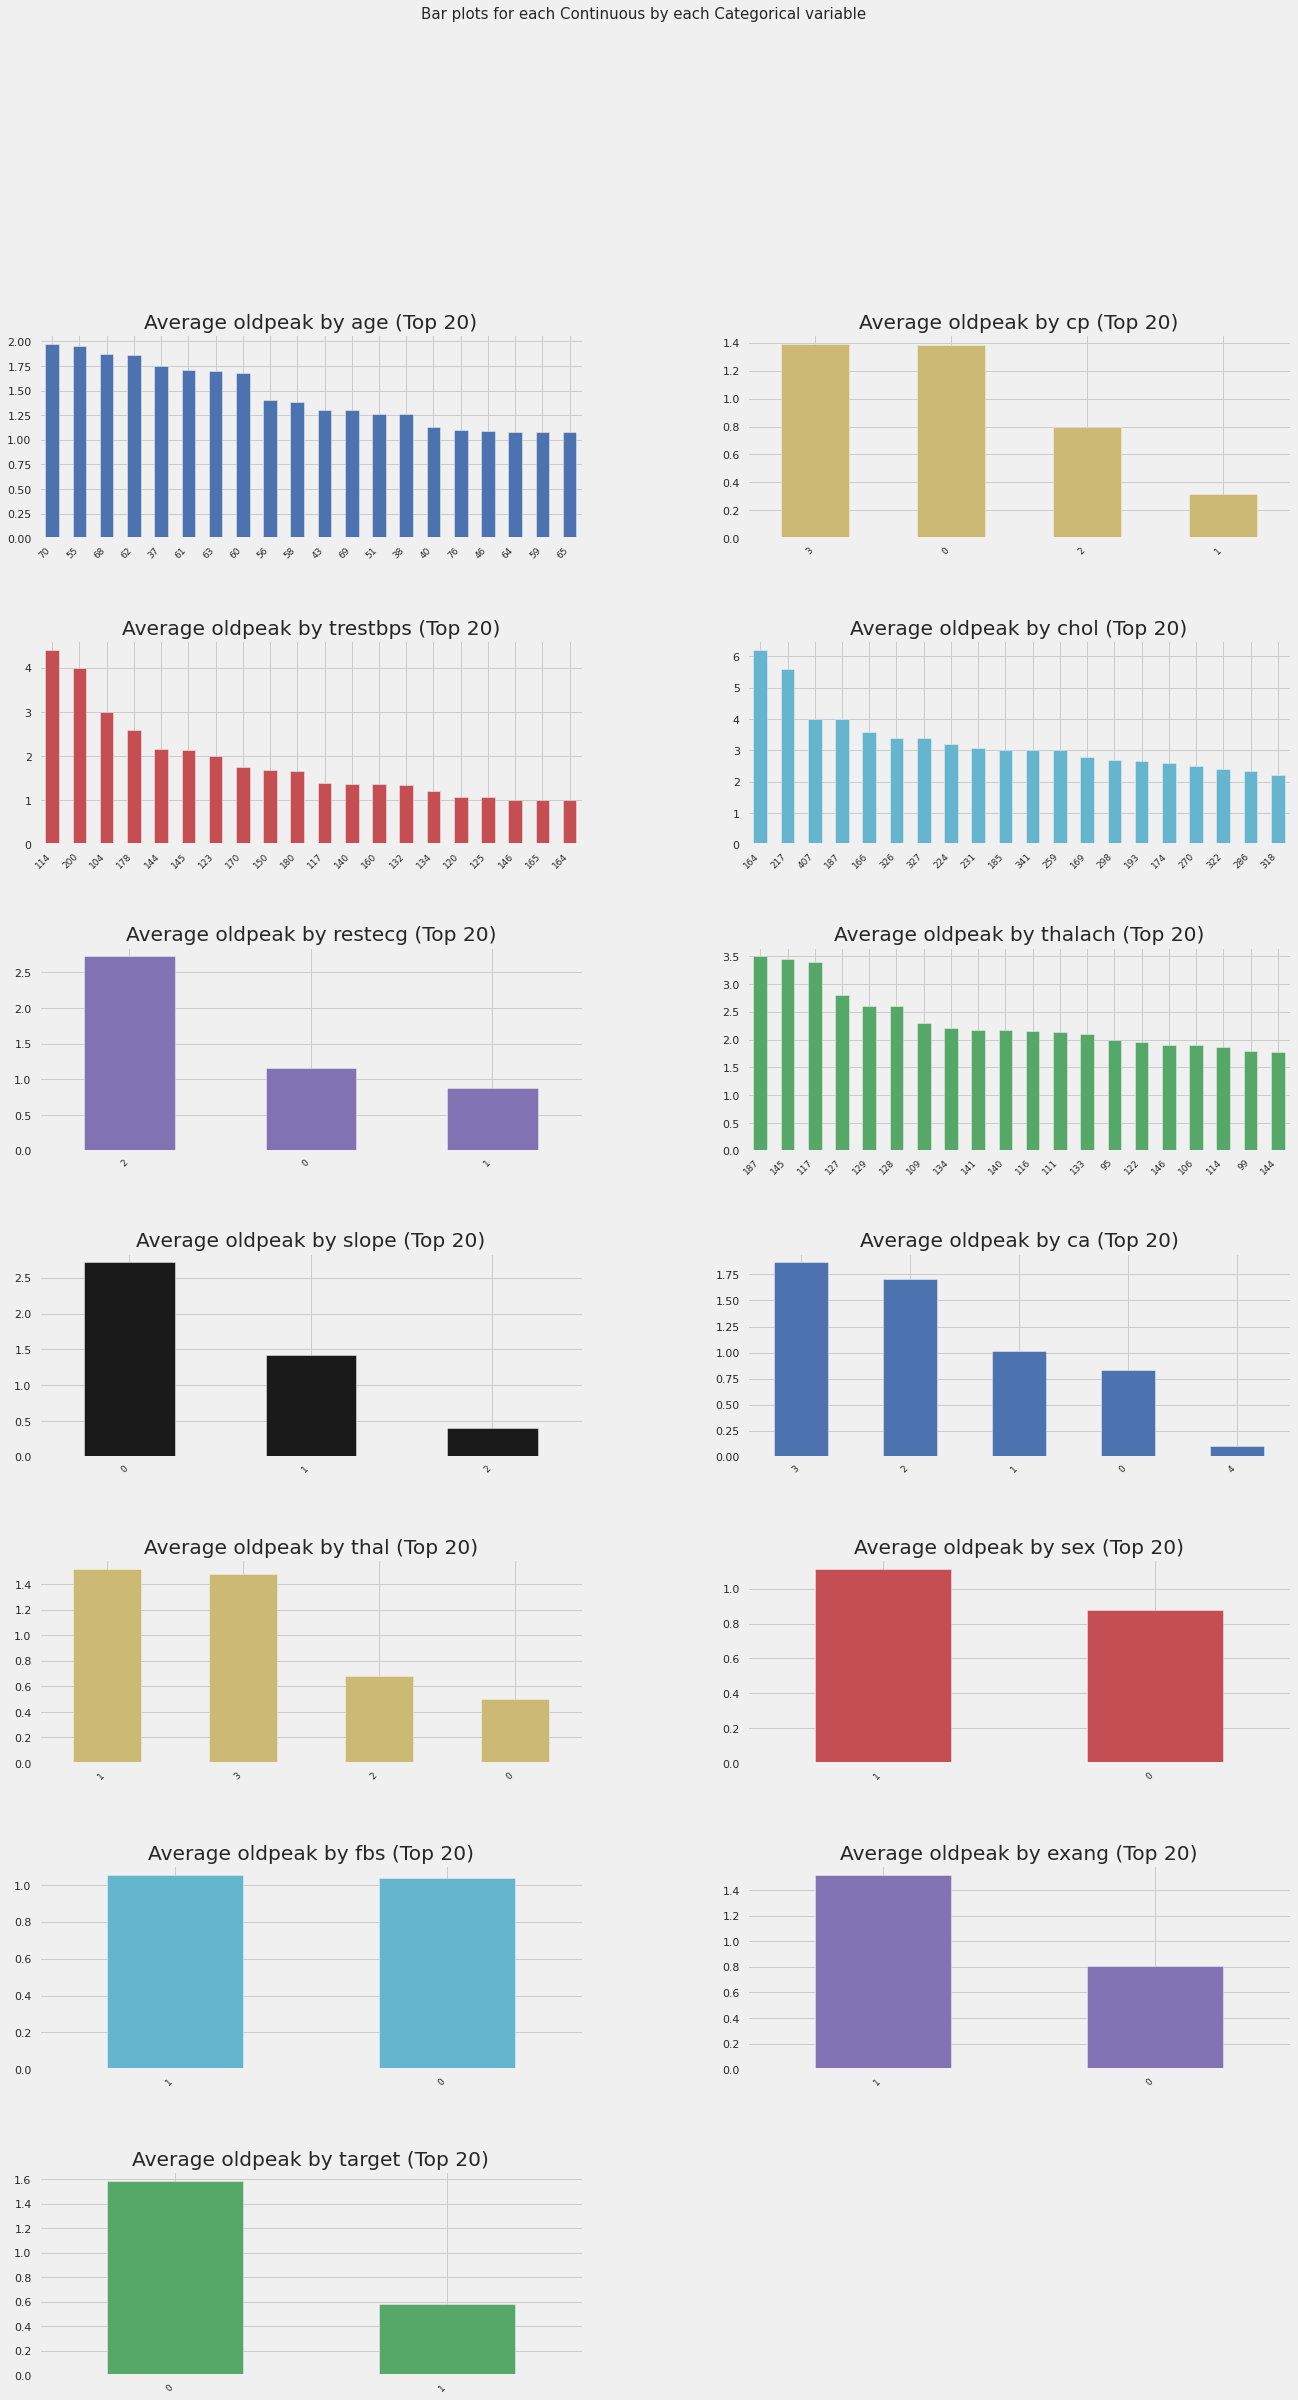

In [38]:
 filename = "HeartDeasese.xlsx"
 sep = ","
 dft = AV.AutoViz(     filename,    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=500,
     max_cols_analyzed=30,
 )


In [39]:
# Using standard scaling for catogorical variables
b=["age","trestbps","chol","thalach","oldpeak"]
ss = StandardScaler()
data[b] = ss.fit_transform(data[b])

In [40]:
data

age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0    0.945383    1   3  0.760273 -0.265566    1        0  0.014733      0   
1   -1.923874    1   2 -0.092476  0.062929    0        1  1.633884      0   
2   -1.482449    0   1 -0.092476 -0.825941    0        0  0.977471      0   
3    0.172891    1   1 -0.660975 -0.207596    0        1  1.240037      0   
4    0.283247    0   0 -0.660975  2.072551    0        1  0.583624      1   
..        ...  ...  ..       ...       ...  ...      ...       ...    ...   
298  0.283247    0   0  0.476024 -0.110980    0        1 -1.166810      1   
299 -1.041025    1   3 -1.229475  0.333455    0        1 -0.772962      0   
300  1.497164    1   0  0.703423 -1.038498    1        1 -0.379115      0   
301  0.283247    1   0 -0.092476 -2.236541    0        1 -1.516897      1   
302  0.283247    0   1 -0.092476 -0.207596    0        0  1.064993      0   

      oldpeak  slope  ca  thal  target  
0    1.078769      0   0     1       1  
1    2.111632      0   0     2       1  
2    0.304121      2   0     2       1  
3   -0.212311      2   0     2       1  
4   -0.384455      2   0     2       1  
..        ...    ...  ..   ...     ...  
298 -0.728743      1   0     3       0  
299  0.131977      1   0     3       0  
300  2.025560      1   2     3       0  
301  0.131977      1   1     3       0  
302 -0.900887      1   1     2       0  

[300 rows x 14 columns]

In [41]:
#splitting data into dependent and independent variable
X=data.drop("target",axis=1)
y=data.target

## Creation of ML model for prediction


In [42]:
# importing some Sklearn libaries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [43]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=59)

In [44]:
# creating a logistic regression model and training it
Lr=LogisticRegression()
Lr.fit(X_train,y_train)


LogisticRegression()

In [45]:
# Prediction of data
pred=Lr.predict(X_test)

In [46]:
# checking the accuracy 
from sklearn.metrics import accuracy_score

print('test accuracy: ',accuracy_score(y_test,pred)*100)

test accuracy:  80.0


<AxesSubplot:>

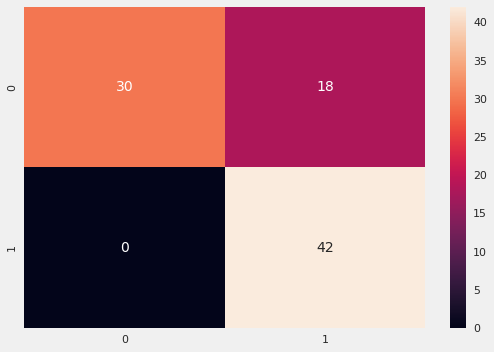

In [47]:
#Plotting confusion matrix 
from sklearn.metrics import confusion_matrix
ss=confusion_matrix(y_test,pred)
sns.heatmap(ss,annot=True)


Classification report of the Model

In [48]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
report=classification_report(y_test,pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.62      0.77        48
           1       0.70      1.00      0.82        42

    accuracy                           0.80        90
   macro avg       0.85      0.81      0.80        90
weighted avg       0.86      0.80      0.79        90



In [49]:
#creating a logistic regression using statsmodel API
from statsmodels.base import model
import statsmodels.api as sm
from scipy import stats


In [50]:
logreg = sm.Logit(y_train,X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.343215
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  210
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                           12
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.4964
Time:                        10:40:49   Log-Likelihood:                -72.075
converged:                       True   LL-Null:                       -143.11
Covariance Type:            nonrobust   LLR p-value:                 2.280e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0981      0.260     -0.377      0.706      -0.608       0.412
sex           -1.5038      0.

In [51]:
# Selection of those features with P value < 0.05
new_features = ['sex','cp','ca','oldpeak']
new_X = data[new_features]
new_X.head()

sex  cp  ca   oldpeak
0    1   3   0  1.078769
1    1   2   0  2.111632
2    0   1   0  0.304121
3    1   1   0 -0.212311
4    0   0   0 -0.384455

In [52]:
#splitting the data into train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(new_X, y, test_size = 0.3, random_state=5)

print('X1_train:',X1_train.shape)
print('X1_test :',X1_test.shape)
print('y1_train:',y1_train.shape)
print('y1_test :',y1_test.shape)

X1_train: (210, 4)
X1_test : (90, 4)
y1_train: (210,)
y1_test : (90,)


In [53]:
#implementing the model
logreg1 = sm.Logit(y1_train, X1_train).fit()

Optimization terminated successfully.
         Current function value: 0.411345
         Iterations 7


In [54]:
# checking the model summary
print(logreg1.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  210
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                            3
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.4018
Time:                        10:40:50   Log-Likelihood:                -86.383
converged:                       True   LL-Null:                       -144.41
Covariance Type:            nonrobust   LLR p-value:                 5.476e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.0548      0.315     -3.343      0.001      -1.673      -0.436
cp             1.2127      0.187      6.471      0.000       0.845       1.580
ca            -0.6852      0.200     -3.425      0.0

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

logreg1_pred = logreg1.predict(X1_test)
preds1 = list(map(round, logreg1_pred))

print('Accuracy score',accuracy_score(y1_test, preds1))
print('Recall score',recall_score(y1_test, preds1))
print('Precision score',precision_score(y1_test, preds1))
print('f1 score',f1_score(y1_test, preds1))


Accuracy score 0.8333333333333334
Recall score 0.8297872340425532
Precision score 0.8478260869565217
f1 score 0.8387096774193549


<AxesSubplot:>

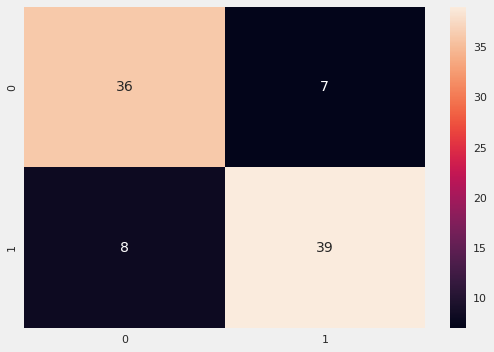

In [56]:
cm = confusion_matrix(y1_test,preds1)
sns.heatmap(cm,annot=True)

In [57]:
# creating a random forest model
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier()


In [58]:
# training and predicting 
Rf.fit(X_train,y_train)

pred1=Rf.predict(X_test)

In [59]:
print("Test Accuracy :",accuracy_score(y_test,pred1)*100)

Test Accuracy : 77.77777777777779


<AxesSubplot:>

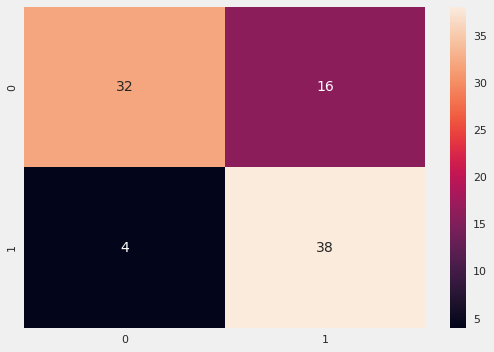

In [60]:
ss1=confusion_matrix(y_test,pred1)
sns.heatmap(ss1,annot=True)

In [61]:
report1=classification_report(y_test,pred1)
print(report1)

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        48
           1       0.70      0.90      0.79        42

    accuracy                           0.78        90
   macro avg       0.80      0.79      0.78        90
weighted avg       0.80      0.78      0.78        90

